In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
x_train = h5py.File("./data/X_train.h5", "r")
y_train = pd.read_csv("./data/y_train.csv").values[:, 1].squeeze()

In [14]:
x_train = x_train["features"][:1000]
y_train = y_train[:1000]

In [28]:
def print_eeg_label(label):
    valid = x_train[y_train == label]
    eeg = valid[np.random.randint(valid.shape[0])][11:]
    plt.plot(eeg)

In [104]:
def print_eeg_fft(label):
    valid = x_train[y_train == label]
    eeg   = valid[np.random.randint(valid.shape[0])][11:]
    freq  = np.fft.fftfreq(eeg.shape[0]) 
    plt.plot(freq*125, np.abs(np.fft.fft(eeg)))

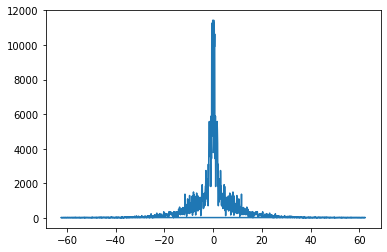

In [105]:
print_eeg_fft(0)

In [42]:
x_train[y_train == 1]

array([[ 1.76000000e+02,  1.46883435e+02,  3.38039773e+02, ...,
         7.84836548e+00,  4.03351707e+00, -2.11004645e+00],
       [ 4.56000000e+02,  1.52376541e+02,  3.35629386e+02, ...,
        -1.28639078e+01, -1.19511753e+01, -5.53179900e+00],
       [ 2.10000000e+01,  1.39720772e+02,  3.36285714e+02, ...,
         1.66707113e-01,  6.05453866e+00,  1.20863507e+01],
       ...,
       [ 3.60000000e+01,  1.44834255e+02,  2.60472222e+02, ...,
        -1.89887276e+01, -1.62790626e+01, -6.30519552e+00],
       [ 3.88000000e+02,  1.40427628e+02,  2.95984536e+02, ...,
         3.11106388e+00,  2.65960274e+00,  5.22418756e+00],
       [ 7.10000000e+01,  1.40760121e+02,  2.87267606e+02, ...,
        -4.36847771e+01, -4.12768076e+01, -3.99769169e+01]])